In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder # imported label encoder to encode the non numeric values 

In [3]:
from scipy import stats

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('Housing.csv');

In [15]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [17]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [18]:
# Check the values in each column
for column in df.columns.tolist():
    if df[column].dtype != 'int64':
        display(df[column].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom
no     448
yes     97
Name: count, dtype: int64

basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [19]:
furnishingstatus_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_map)

In [20]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,2
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,2


In [21]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64':
        df[column] = label_encoder.fit_transform(df[column])

In [22]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


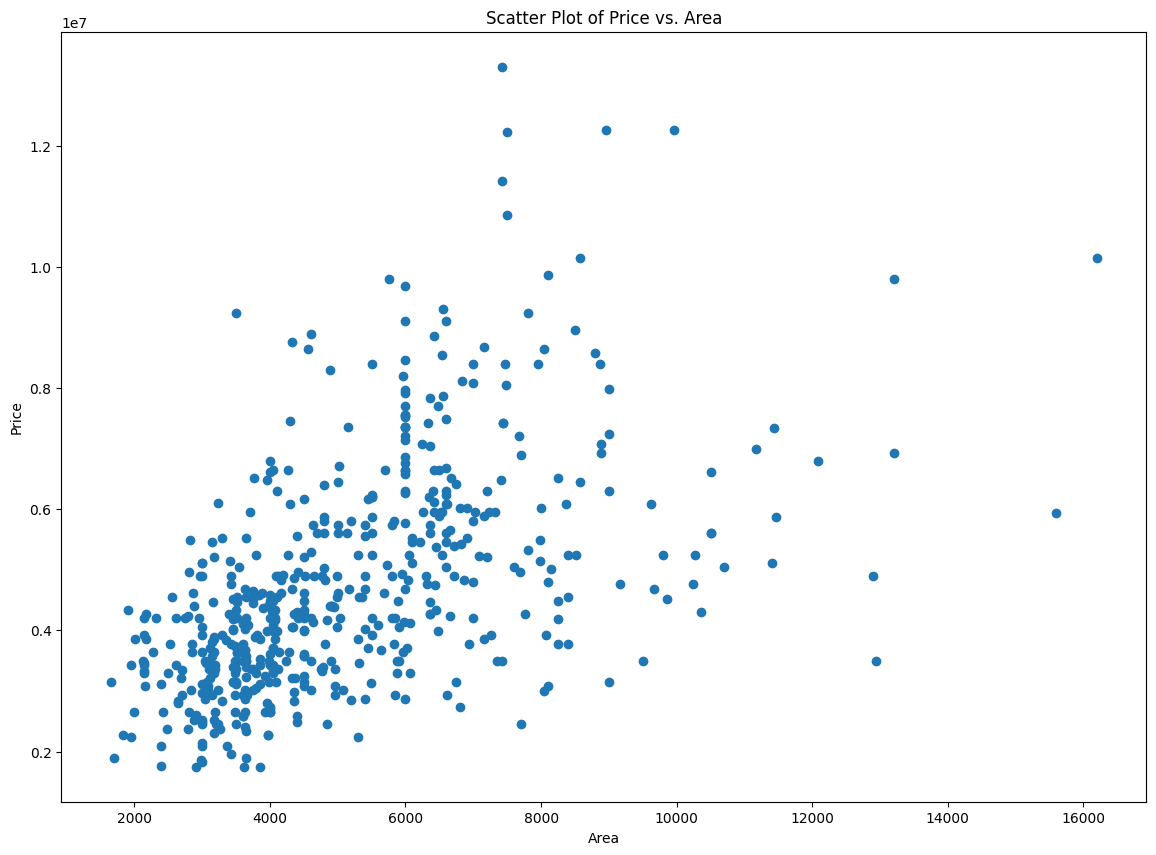

In [58]:
plt.figure(figsize=(14, 10))
plt.scatter(df['area'], df['price'])
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

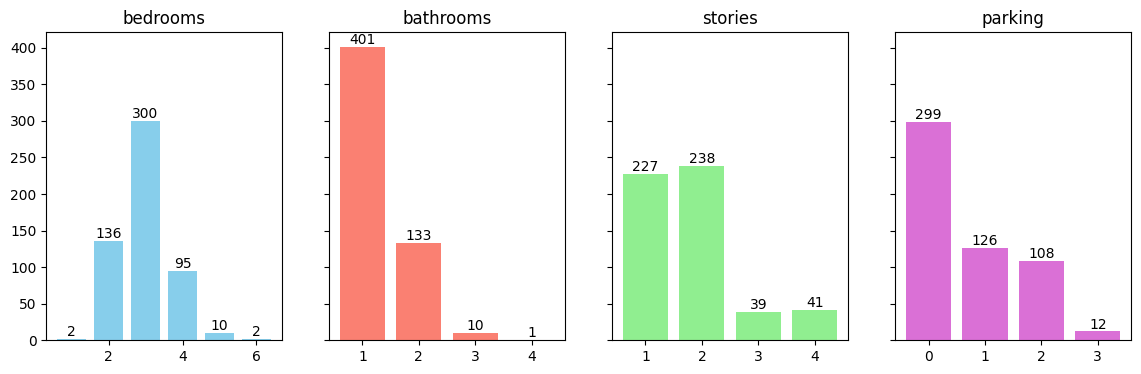

In [84]:
cols = ['bedrooms', 'bathrooms', 'stories', 'parking']
colors = ['skyblue', 'salmon', 'lightgreen', 'orchid']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4), sharey=True)
for i, column in enumerate(cols):
    plt.subplot(1, 4, i+1)
    value_counts = df[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

In [11]:
# Create a new dataframe for to preprocess
df_preprocessed = df.copy()

In [12]:
# Replace the non numeric values using label encoder
label_encoder = LabelEncoder()
for column in df_preprocessed.columns:
    if df_preprocessed[column].dtype != 'int64':
        df_preprocessed[column] = label_encoder.fit_transform(df[column])

In [13]:
# Check the data types in the dataframe
df_preprocessed.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [14]:
df_preprocessed

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [15]:
# df_preprocessed = df_preprocessed.sort_values('price', ascending=True)

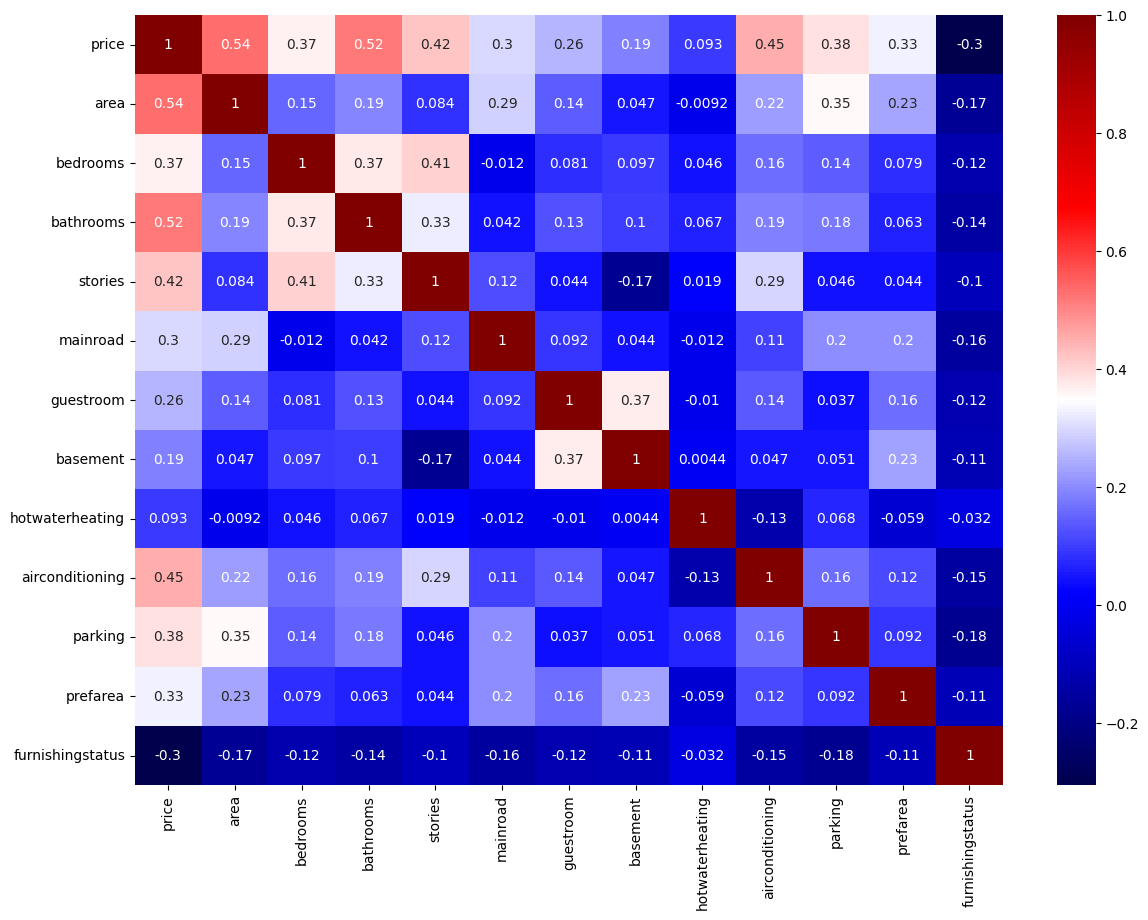

In [17]:
# Correlation matrix for the 1 dataframe
correlation_matrix = df_preprocessed.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()

In [18]:
display(df_preprocessed.describe())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [19]:
z_scores = pd.DataFrame(stats.zscore(df_preprocessed))

In [20]:
display(z_scores)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [21]:
outliers = (z_scores > 3).any(axis=1)
df_preprocessed = df_preprocessed[~outliers]

In [22]:
display(df_preprocessed)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,1
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,1
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [23]:
# Separating the dataframe into the 2 parts
X = df_preprocessed.drop('price', axis=1)
y = df_preprocessed['price']

In [24]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,1,1,1,0,1,2,1,0
9,5750,3,2,4,1,1,0,0,1,1,1,2
12,6550,4,2,2,1,0,0,0,1,1,1,1
14,7800,3,2,2,1,0,0,0,0,0,1,1
15,6000,4,1,2,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [25]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,1,1,1,0,1,2,1,0
9,5750,3,2,4,1,1,0,0,1,1,1,2
12,6550,4,2,2,1,0,0,0,1,1,1,1
14,7800,3,2,2,1,0,0,0,0,0,1,1
15,6000,4,1,2,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [26]:
# Spliting the data into the training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# Standartizing the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in X.columns:
    X_train[column] = scaler.fit_transform(np.array(X_train[column]).reshape(-1, 1))
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_train = np.ravel(y_train)

In [28]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
382,-0.983338,0.065171,-0.566738,0.207685,0.408248,-0.473209,1.367664,0.0,-0.707107,-0.797470,-0.559017,-1.448812
400,-0.793175,-1.379457,-0.566738,-0.927470,0.408248,-0.473209,-0.731174,0.0,-0.707107,0.381014,1.788854,1.246181
134,1.039111,0.065171,-0.566738,-0.927470,0.408248,-0.473209,1.367664,0.0,-0.707107,1.559498,1.788854,-0.101316
65,2.026696,0.065171,1.764484,0.207685,0.408248,-0.473209,1.367664,0.0,1.414214,0.381014,-0.559017,-1.448812
495,-0.536823,0.065171,-0.566738,0.207685,0.408248,-0.473209,-0.731174,0.0,-0.707107,0.381014,-0.559017,1.246181
...,...,...,...,...,...,...,...,...,...,...,...,...
242,-0.725936,0.065171,-0.566738,0.207685,0.408248,-0.473209,-0.731174,0.0,1.414214,-0.797470,-0.559017,-1.448812
88,1.254488,0.065171,-0.566738,-0.927470,0.408248,2.113233,1.367664,0.0,1.414214,1.559498,1.788854,1.246181
40,0.802721,0.065171,-0.566738,0.207685,0.408248,-0.473209,1.367664,0.0,1.414214,-0.797470,1.788854,-1.448812
227,0.513799,-1.379457,-0.566738,-0.927470,0.408248,-0.473209,1.367664,0.0,1.414214,0.381014,-0.559017,-1.448812


In [30]:
# Training a LinearRegression model
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 747784661551.8699
Mean Absolute Error: 647939.036259036
R-squared: 0.702422904711089


In [31]:
# Training a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=56, 
                           verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 597978436607.9585
Mean Absolute Error: 607827.4183333333
R-squared: 0.7620375285019705


In [32]:
xgb = RandomForestRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 627749910234.2505
Mean Absolute Error: 626949.340111111
R-squared: 0.7501901222904058
